In [1]:
import pandas as pd
import os
import sys
sys.path.insert(1,'../tools')
from collections import defaultdict
import imp
import re
import time
import json
import pickle
from tqdm import tqdm
import numpy as np
import utils
from multiprocessing import Pool
import pdb
from sklearn.model_selection import train_test_split
sys.path.append('/home/zilong.zhang1/AE_automation/ClarityNLP/nlp')
sys.path.append('/home/zilong.zhang1/AE_automation/ClarityNLP/')
import Sentence_tokenizer_from_Clarity as cla_token


No section: 'ohdsi'
Initializing models for term finder...
section_tagger_init...
Context init...
Context init...
Segmentation init...
Done initializing models for term finder...
Initializing models for value extractor...
Done initializing models for value extractor...
Initializing models for measurement finder...
Done initializing models for measurement finder..


In [2]:
chart_dict = json.load(open('./tmp/chart_dict.json'))

In [3]:
d_item_df = pd.read_csv('../data/D_ITEMS.csv') 
pu_item = d_item_df[d_item_df['LABEL'].str.contains("pressure ulcer",flags=re.IGNORECASE,na=False)]
pu_item2 = d_item_df[d_item_df['LABEL'].str.contains("pressure sore",flags=re.IGNORECASE,na=False)]
id_label_dict = {}
for i,row in pu_item.iterrows():
    id_label_dict[str(row['ITEMID'])] = row['LABEL']
for i,row in pu_item2.iterrows():
    id_label_dict[str(row['ITEMID'])] = row['LABEL']
    
id_label_dict2 = {}
for k,v in id_label_dict.items():
    if '1' not in v and 'heal' not in v.lower():
        id_label_dict2[k] = v

In [4]:
id_label_dict2

{'224965': 'Pressure Ulcer Stage #2',
 '224966': 'Pressure Ulcer Stage #3',
 '224967': 'Pressure Ulcer Stage #4',
 '224968': 'Pressure Ulcer Stage #5',
 '224969': 'Pressure Ulcer Stage #6',
 '224970': 'Pressure Ulcer Stage #7',
 '224971': 'Pressure Ulcer Stage #8',
 '227618': 'Pressure Ulcer Stage #9',
 '228507': 'Pressure Ulcer #2- Location',
 '228508': 'Pressure Ulcer #3- Location',
 '228509': 'Pressure Ulcer #4- Location',
 '228510': 'Pressure Ulcer #5- Location',
 '228511': 'Pressure Ulcer #6- Location',
 '228512': 'Pressure Ulcer #7- Location',
 '228513': 'Pressure Ulcer #8- Location',
 '228514': 'Pressure Ulcer #9- Location',
 '228540': 'Pressure Ulcer #2- Treatment',
 '228541': 'Pressure Ulcer #3- Treatment',
 '228542': 'Pressure Ulcer #4- Treatment',
 '228543': 'Pressure Ulcer #5- Treatment',
 '228544': 'Pressure Ulcer #6- Treatment',
 '228545': 'Pressure Ulcer #7- Treatment',
 '228546': 'Pressure Ulcer #8- Treatment',
 '228547': 'Pressure Ulcer #9- Treatment',
 '228550': 'Pres

In [5]:
count_dict = defaultdict(lambda:0)
severe_PU_ids = id_label_dict2.keys()
for k,v in chart_dict.items():
    for item_id in severe_PU_ids:
        if item_id in v:
            count_dict[item_id] +=1

In [6]:
count_dict

defaultdict(<function __main__.<lambda>()>,
            {'224965': 1807,
             '224966': 1053,
             '224967': 594,
             '224968': 351,
             '224969': 219,
             '224970': 136,
             '224971': 81,
             '227618': 55,
             '552': 645,
             '553': 221,
             '559': 542,
             '560': 192,
             '562': 445,
             '563': 155,
             '574': 494,
             '575': 168,
             '577': 243,
             '8461': 304,
             '8462': 119,
             '8464': 430,
             '8465': 153})

In [7]:
log = '{} : {} are labeled for {} times'
kkk = list(count_dict.keys())
vvv = list(count_dict.values())
import numpy as np
kkk = np.array(kkk)
vvv = np.array(vvv)
inds = (-vvv).argsort()
kkk_sorted = kkk[inds]
vvv_sorted = vvv[inds]
for i in range(len(kkk_sorted)):
    k = kkk_sorted[i]
    v = vvv_sorted[i]
    k2 = id_label_dict2[k]
    print(log.format(k,k2,v))

224965 : Pressure Ulcer Stage #2 are labeled for 1807 times
224966 : Pressure Ulcer Stage #3 are labeled for 1053 times
552 : Pressure Sore #2 [Stage] are labeled for 645 times
224967 : Pressure Ulcer Stage #4 are labeled for 594 times
559 : Pressure Sore #2 [Drainage] are labeled for 542 times
574 : Pressure Sore Odor#2 are labeled for 494 times
562 : Pressure Sore #2 [Width] are labeled for 445 times
8464 : Pressure Sore #2 [Length] are labeled for 430 times
224968 : Pressure Ulcer Stage #5 are labeled for 351 times
8461 : Pressure Sore #2 [Amount] are labeled for 304 times
577 : Pressure Sore Site#3 are labeled for 243 times
553 : Pressure Sore #3 [Stage] are labeled for 221 times
224969 : Pressure Ulcer Stage #6 are labeled for 219 times
560 : Pressure Sore #3 [Drainage] are labeled for 192 times
575 : Pressure Sore Odor#3 are labeled for 168 times
563 : Pressure Sore #3 [Width] are labeled for 155 times
8465 : Pressure Sore #3 [Length] are labeled for 153 times
224970 : Pressure U

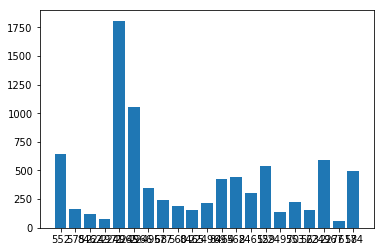

In [9]:
import matplotlib.pyplot as plt
keys = count_dict.keys()
values = count_dict.values()
plt.bar(keys, values)
plt.show()

In [9]:
d_item_df = pd.read_csv('../data/D_ITEMS.csv') 
pu_item = d_item_df[d_item_df['LABEL'].str.contains("pressure ulcer",flags=re.IGNORECASE,na=False)]
pu_item2 = d_item_df[d_item_df['LABEL'].str.contains("pressure sore",flags=re.IGNORECASE,na=False)]

In [ ]:
id_label_dict = {}
for i,row in pu_item.iterrows():
    id_label_dict[str(row['ITEMID'])] = row['LABEL']
for i,row in pu_item2.iterrows():
    id_label_dict[str(row['ITEMID'])] = row['LABEL']


In [49]:
id_label_dict2 = {}
for k,v in id_label_dict.items():
    if '1' not in v and ('heal' not in v.lower()):
        id_label_dict2[k] = v
for k,v in id_label_dict2.items():
    print(k,v)

In [52]:
id_label_dict

{}

In [25]:
log = '{} : {} are labeled for {} times'
kkk = list(count_dict.keys())
vvv = list(count_dict.values())
import numpy as np
kkk = np.array(kkk)
vvv = np.array(vvv)
inds = (-vvv).argsort()
kkk_sorted = kkk[inds]
vvv_sorted = vvv[inds]
for i in range(len(kkk_sorted)):
    k = kkk_sorted[i]
    v = vvv_sorted[i]
    k2 = id_label_dict[k]
    print(log.format(k,k2,v))

224631 : Pressure Ulcer Stage #1 are labeled for 3422 times
576 : Pressure Sore Site#1 are labeled for 2392 times
551 : Pressure Sore #1 [Stage] are labeled for 2263 times
8457 : Pressure Sore #1 [Heal] are labeled for 2063 times
558 : Pressure Sore #1 [Drainage] are labeled for 1843 times
224965 : Pressure Ulcer Stage #2 are labeled for 1807 times
573 : Pressure Sore Odor#1 are labeled for 1639 times
561 : Pressure Sore #1 [Width] are labeled for 1389 times
8463 : Pressure Sore #1 [Length] are labeled for 1361 times
224966 : Pressure Ulcer Stage #3 are labeled for 1053 times
8460 : Pressure Sore #1 [Amount] are labeled for 981 times
552 : Pressure Sore #2 [Stage] are labeled for 645 times
224967 : Pressure Ulcer Stage #4 are labeled for 594 times
8458 : Pressure Sore #2 [Heal] are labeled for 585 times
559 : Pressure Sore #2 [Drainage] are labeled for 542 times
574 : Pressure Sore Odor#2 are labeled for 494 times
562 : Pressure Sore #2 [Width] are labeled for 445 times
8464 : Pressure

In [47]:
chart_dict['108784'].keys()

dict_keys(['202', '916', '919', '582', '723', '114', '1533', '1126', '82', '8548', '848', '49', '1623', '1521', '785', '6208', '235', '772', '324', '1484', '236', '704', '454', '548', '567', '527', '1483', '218', '8394', '1043', '535', '763', '769', '731', '547', '801', '637', '788', '821', '797', '6206', '6207', '200', '640', '8476', '816', '707', '705', '450', '242', '434', '604', '631', '8457', '926', '784', '543', '52', '786', '775', '678', '779', '550', '776', '8477', '610', '212', '5819', '722', '165', '8403', '8466', '652', '8467', '829', '285', '159', '616', '8367', '593', '479', '190', '8554', '924', '554', '732', '158', '818', '31', '127', '837', '828', '466', '1538', '471', '651', '586', '814', '927', '8458', '1328', '113', '787', '77', '8378', '54', '8400', '581', '552', '824', '800', '425', '578', '8486', '568', '198', '326', '1528', '856', '80', '833', '39', '8456', '1087', '1397', '283', '680', '1329', '69', '50', '1534', '1089', '166', '781', '1286', '614', '1078', '152

In [48]:
item_csv = '../data/CHARTEVENTS.csv'
chunksize = 10**7
for chunk in pd.read_csv(item_csv, chunksize=chunksize,low_memory=False):
    display(chunk.loc[chunk['ITEMID'] == 224970])


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED


KeyboardInterrupt: 

In [2]:
item_csv = '../data/CHARTEVENTS.csv'
file = open(item_csv)
head = file.readline()
print(head.split(','))
position_dict = {'HADM_ID':2,'ITEMID':4,'CHARTTIME':5,'WARNING':-4,'ERROR':-3,'STOPPED':-1}


['"ROW_ID"', '"SUBJECT_ID"', '"HADM_ID"', '"ICUSTAY_ID"', '"ITEMID"', '"CHARTTIME"', '"STORETIME"', '"CGID"', '"VALUE"', '"VALUENUM"', '"VALUEUOM"', '"WARNING"', '"ERROR"', '"RESULTSTATUS"', '"STOPPED"\n']


In [18]:
count = 0
while count < 1000000:
    line = file.readline()
    if len(line.split(',')) != 15:
        print(line)
    count += 1
print(count)

1000000


In [15]:
len(line.split(','))

15

In [20]:
d_item_df = pd.read_csv('../data/D_ITEMS.csv') 

In [21]:
#df[df['A'].str.contains("hello")]
pu_item = d_item_df[d_item_df['LABEL'].str.contains("pressure ulcer",flags=re.IGNORECASE,na=False)]

In [22]:
len(pu_item)

60

In [23]:
pu_item

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
8804,15408,228610,Pressure Ulcer #1- Depth,Pressure Ulcer #1- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8805,15409,228611,Pressure Ulcer #2- Depth,Pressure Ulcer #2- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8806,15410,228612,Pressure Ulcer #3- Depth,Pressure Ulcer #3- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8807,15411,228613,Pressure Ulcer #4- Depth,Pressure Ulcer #4- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8808,15412,228614,Pressure Ulcer #5- Depth,Pressure Ulcer #5- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8809,15413,228615,Pressure Ulcer #6- Depth,Pressure Ulcer #6- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8810,15414,228616,Pressure Ulcer #7- Depth,Pressure Ulcer #7- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8811,15415,228617,Pressure Ulcer #8- Depth,Pressure Ulcer #8- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8812,15416,228618,Pressure Ulcer #9- Depth,Pressure Ulcer #9- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN
8813,15417,228619,Pressure Ulcer #10- Depth,Pressure Ulcer #10- Depth,metavision,chartevents,Skin - Impairment,cm,Numeric,NaN


In [24]:
pu_item2 = d_item_df[d_item_df['LABEL'].str.contains("pressure sore",flags=re.IGNORECASE,na=False)]

In [77]:
pu_item_ID = list(pu_item['ITEMID'])
pu_label = list(pu_item['LABEL'])
pu_item_ID.extend(list(pu_item2['ITEMID']))
pu_label.extend(list(pu_item2['LABEL']))

In [79]:
for i in range(len(pu_item_ID)):
    print(pu_item_ID[i],pu_label[i])

228610 Pressure Ulcer #1- Depth
228611 Pressure Ulcer #2- Depth
228612 Pressure Ulcer #3- Depth
228613 Pressure Ulcer #4- Depth
228614 Pressure Ulcer #5- Depth
228615 Pressure Ulcer #6- Depth
228616 Pressure Ulcer #7- Depth
228617 Pressure Ulcer #8- Depth
228618 Pressure Ulcer #9- Depth
228619 Pressure Ulcer #10- Depth
228620 Pressure Ulcer #1- Width
228621 Pressure Ulcer #2- Width
228622 Pressure Ulcer #3- Width
228623 Pressure Ulcer #4- Width
228624 Pressure Ulcer #5- Width
228625 Pressure Ulcer #6- Width
228626 Pressure Ulcer #7- Width
228627 Pressure Ulcer #8- Width
228628 Pressure Ulcer #9- Width
228629 Pressure Ulcer #10- Width
228539 Pressure Ulcer #1- Treatment
228540 Pressure Ulcer #2- Treatment
228541 Pressure Ulcer #3- Treatment
228542 Pressure Ulcer #4- Treatment
228543 Pressure Ulcer #5- Treatment
228544 Pressure Ulcer #6- Treatment
228545 Pressure Ulcer #7- Treatment
228546 Pressure Ulcer #8- Treatment
228547 Pressure Ulcer #9- Treatment
228548 Pressure Ulcer #10- Treatme

In [36]:
aaa = chunk.loc[chunk['ITEMID'] ==  pu_item_ID[i]]
type(aaa)

pandas.core.frame.DataFrame

In [45]:
pu_item_ID

[228610,
 228611,
 228612,
 228613,
 228614,
 228615,
 228616,
 228617,
 228618,
 228619,
 228620,
 228621,
 228622,
 228623,
 228624,
 228625,
 228626,
 228627,
 228628,
 228629,
 228539,
 228540,
 228541,
 228542,
 228543,
 228544,
 228545,
 228546,
 228547,
 228548,
 228549,
 228550,
 228551,
 228552,
 228553,
 228554,
 228555,
 228556,
 228557,
 228558,
 228506,
 228507,
 228508,
 228509,
 228510,
 228511,
 228512,
 228513,
 228514,
 228515,
 227618,
 227619,
 224965,
 224966,
 224967,
 224968,
 224969,
 224970,
 224971,
 224631]

In [ ]:
#association_check:
main_ids = ['227618','227619','224965','224966','224967','224968','224969','224970','224971','224631','551','552','553']
minor_ids = ['558','559','560','561','562','563','573','574','575','576','577','8457','8458','8459','8460','8461','8462','8463','8464','8465','228610','228611','228612','228613','228614','228615','228616','228617','228618','228619','228620','228621','228622','228623','228624','228625','228626','228627','228628','228629','228539','228540','228541','228542','228543','228544','228545','228546','228547','228548','228549','228550','228551','228552','228553','228554','228555','228556','228557','228558','228506','228507','228508','228509','228510','228511','228512','228513','228514','228515']
wrong_chart_adm_ids = defaultdict(lambda:[])
for k,v in chart_dict.items():
    for minor_id in minor_ids:
        if minor_id in v:
            main_presence = 0
            for main_id in main_ids:
                main_presence =+ (main_id in v)
            if not main_presence:
                print(k,minor_id)
                wrong_chart_adm_ids[k].append(minor_id)
                print('\n')
                #print('ERROR')

In [85]:
len(wrong_chart_adm_ids)

2201

In [86]:
count_dict = {}
for minor_id in minor_ids:
    count_dict[minor_id] = 0
for main_id in main_ids:
    count_dict[main_id] = 0
    
for k,v in chart_dict.items():
    for minor_id in minor_ids:
        if minor_id in v:
            count_dict[minor_id] +=1
    for main_id in main_ids:
        if main_id in v:
            count_dict[main_id] +=1        

In [87]:
count_dict

{'224631': 3422,
 '224965': 1807,
 '224966': 1053,
 '224967': 594,
 '224968': 351,
 '224969': 219,
 '224970': 136,
 '224971': 81,
 '227618': 55,
 '227619': 34,
 '228506': 0,
 '228507': 0,
 '228508': 0,
 '228509': 0,
 '228510': 0,
 '228511': 0,
 '228512': 0,
 '228513': 0,
 '228514': 0,
 '228515': 0,
 '228539': 0,
 '228540': 0,
 '228541': 0,
 '228542': 0,
 '228543': 0,
 '228544': 0,
 '228545': 0,
 '228546': 0,
 '228547': 0,
 '228548': 0,
 '228549': 0,
 '228550': 0,
 '228551': 0,
 '228552': 0,
 '228553': 0,
 '228554': 0,
 '228555': 0,
 '228556': 0,
 '228557': 0,
 '228558': 0,
 '228610': 0,
 '228611': 0,
 '228612': 0,
 '228613': 0,
 '228614': 0,
 '228615': 0,
 '228616': 0,
 '228617': 0,
 '228618': 0,
 '228619': 0,
 '228620': 0,
 '228621': 0,
 '228622': 0,
 '228623': 0,
 '228624': 0,
 '228625': 0,
 '228626': 0,
 '228627': 0,
 '228628': 0,
 '228629': 0,
 '551': 2264,
 '552': 645,
 '553': 221,
 '558': 1843,
 '559': 542,
 '560': 192,
 '561': 1389,
 '562': 445,
 '563': 155,
 '573': 1639,
 '574'

In [80]:
True + False

1

In [73]:
for k,v in chart_dict.items():
    if '551' in v or '224631' in v:
        print(k)
        break

189205


In [76]:
chart_dict[k]['224631']

['2152-04-21 03:18:00',
 '2152-04-20 08:00:00',
 '2152-04-22 10:35:00',
 '2152-04-22 20:00:00',
 '2152-04-23 00:00:00',
 '2152-04-19 20:00:00',
 '2152-04-20 12:00:00',
 '2152-04-19 12:00:00',
 '2152-04-21 17:25:00',
 '2152-04-20 19:23:00',
 '2152-04-21 08:22:00',
 '2152-04-21 12:43:00',
 '2152-04-22 04:00:00',
 '2152-04-23 04:00:00',
 '2152-04-20 00:19:00',
 '2152-04-20 04:46:00',
 '2152-04-19 16:00:00',
 '2152-04-21 20:00:00',
 '2152-04-22 00:00:00',
 '2152-04-20 23:58:00']

In [66]:
count

5

In [ ]:
count = 0
for 
df.loc[df['ITEMID'] == 'yellow']

In [26]:
tmp = list(d_item_df.duplicated(subset=['ITEMID']) == True)
np.sum(tmp)

0

In [30]:
all_item_ids = list(pu_item2['ITEMID'])
all_item_ids.extend(list(pu_item['ITEMID']))

In [32]:
len(all_item_ids)

83

In [37]:
len(pu_item2)

23

In [ ]:
['"ROW_ID"', '"SUBJECT_ID"', '"HADM_ID"', '"ICUSTAY_ID"', '"ITEMID"', '"CHARTTIME"', '"STORETIME"', '"CGID"', '"VALUE"', '"VALUENUM"', '"VALUEUOM"', '"WARNING"', '"ERROR"', '"RESULTSTATUS"', '"STOPPED"\n']

In [35]:
head.split(',')[2]

'"HADM_ID"'

In [37]:
head.split(',')[4]

'"ITEMID"'

In [38]:
head.split(',')[5]

'"CHARTTIME"'

In [41]:
head.split(',')[-4]

'"WARNING"'

In [50]:
chart_dict = defaultdict(lambda:[])


In [109]:
chunk['STOPPED'].unique()

array([0, 'NotStopd', "D/C'd"], dtype=object)

In [111]:
np.array(chunk['STOPPED'])!=0

array([ True,  True,  True, ...,  True,  True,  True])

In [112]:
np.array(chunk['STOPPED'])

array(['NotStopd', 'NotStopd', 'NotStopd', ..., 'NotStopd', 'NotStopd',
       'NotStopd'], dtype=object)

In [113]:
chunk.fillna(0,inplace=True)

In [116]:
chunk.replace('NotStopd', 0,inplace=True)

In [117]:
np.array(chunk['STOPPED'])!=0

array([False, False, False, ..., False, False, False])

In [121]:
np.sum(chunk['STOPPED']!=0)

4052

In [4]:
chunksize = 10 ** 7
chunk = next(pd.read_csv(item_csv, chunksize=chunksize))
chunk['WARNING'].unique()

array([0, 1])

In [5]:
start = time.time()
item_csv = '../data/CHARTEVENTS.csv'
chunksize = 10 ** 7
count = 0
des_dir = './tmp/'
chart_dict = defaultdict(lambda:defaultdict(lambda:[]))
for chunk in pd.read_csv(item_csv, chunksize=chunksize,low_memory=False):
    #chunk = next(pd.read_csv(item_csv, chunksize=chunksize))
    chunk.dropna(subset=['HADM_ID', 'ITEMID','CHARTTIME'],inplace=True)
    chunk.fillna(0,inplace=True)
    chunk.replace('NotStopd', 0,inplace=True)
    is_error = np.array(chunk['WARNING']) + np.array(chunk['ERROR']) + (np.array(chunk['STOPPED'])!=0)
    valid_ind = np.where(is_error == 0)[0]
    hadm_id_list = np.array(chunk['HADM_ID'])[valid_ind]
    item_id_list = np.array(chunk['ITEMID'])[valid_ind]
    chart_time_list = np.array(chunk['CHARTTIME'])[valid_ind]
    for i in range(len(valid_ind)):
        chart_dict[str(hadm_id_list[i])][str(item_id_list[i])].append(chart_time_list[i]) #.append([str(item_id_list[i]),chart_time_list[i]])
    count = count + 1
    print(time.time() - start)
json.dump(chart_dict,open(des_dir + 'chart_dict.json','w'))
print(count)

62.168211936950684
128.5342812538147
195.92559337615967
266.07940006256104
334.0124099254608
400.6426992416382
467.7315561771393
533.0958316326141
600.5104167461395
665.8457992076874
731.8336415290833
800.3103098869324
866.1408195495605
931.8375725746155
1000.5097770690918
1065.8895754814148
1130.9358422756195
1196.1576178073883
1265.2412929534912
1332.0272686481476
1398.5452735424042
1466.1550586223602
1533.4557473659515
1603.4900920391083
1672.695607662201
1747.128127336502
1815.0735597610474
1882.266900062561
1950.1006774902344
2017.2949435710907
2090.4522264003754
2157.290638923645
2223.4552347660065
2228.2294664382935
34


In [6]:
adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [8]:
np.sum(adm_df['HADM_ID'].duplicated() == True)

0

In [14]:
adm_csv = '../data/ADMISSIONS.csv'
adm_df = pd.read_csv(adm_csv)
adm_df.dropna(subset=['HADM_ID', 'ADMITTIME'],inplace=True)
adm_time_dict = {}
for index, row in adm_df.iterrows():
    adm_time_dict[str(row['HADM_ID'])] = row['ADMITTIME']
json.dump(adm_time_dict,open(des_dir + 'adm_time_dict.json','w'))

In [15]:
len(adm_time_dict)

58976

In [17]:
adm_time_dict['131072']

'2148-05-29 08:00:00'

In [19]:
chart_dict['131072']['220046']

['2148-05-29 20:02:00', '2148-05-30 08:00:00', '2148-05-29 12:06:00']

In [12]:
json.dump(chart_dict,open('test.json','w'))

In [18]:
chart_dict.keys()

dict_keys(['154648', '177536', '147406', '186680', '120675', '163539', '110302', '124439', '118470', '100361', '152037', '115143', '137389', '124531', '189332', '115545', '130587', '183391', '144371', '108168', '143497', '180659', '102039', '197426', '159163', '102959', '125861', '145681', '185291', '148770', '181445', '100931', '127294', '117599', '132744', '161958', '183870', '162248', '163199', '112028', '123242', '191117', '108294', '192670', '154086', '147143', '151104', '135773', '151534', '170299', '177047', '100068', '163541', '146623', '122585', '113717', '160927', '121527', '135926', '106048', '109633', '118991', '102365', '195990', '178509', '114939', '109309', '136921', '190600', '188973', '142000', '134369', '169479', '161129', '172079', '124456', '189998', '164646', '139855', '171462', '124460', '182796', '103169', '101259', '155256', '104739', '120994', '108877', '112077', '188969', '180818', '167830', '150732', '118210', '139869', '158975', '115180', '199384', '119255',

In [24]:
chart_dict['165660']['224330']

['2134-05-12 12:00:00',
 '2134-05-12 13:00:00',
 '2134-05-12 14:40:00',
 '2134-05-12 15:02:00',
 '2134-05-12 16:00:00',
 '2134-05-12 07:00:00',
 '2134-05-12 08:00:00',
 '2134-05-12 09:11:00',
 '2134-05-12 10:34:00',
 '2134-05-12 11:18:00']

In [7]:
%%time
chart_dict1 = json.load(open('./tmp/chart_dict1.json'))
chart_dict2 = json.load(open('./tmp/chart_dict2.json'))

CPU times: user 17.9 s, sys: 2.02 s, total: 19.9 s
Wall time: 26.8 s


In [9]:
%%time
for k,v in chart_dict1.items():
    if k in chart_dict2:
        chart_dict1[k].extend(chart_dict2[k])
        del chart_dict2[k]
        print(k)

CPU times: user 2.58 ms, sys: 7 µs, total: 2.58 ms
Wall time: 2.6 ms


In [108]:
np.array(chunk['STOPPED'])

array([0, 0, 0, ..., 'NotStopd', 'NotStopd', 'NotStopd'], dtype=object)

In [95]:
chart_dict['114690']

[]

In [98]:
str(114690)

'114690'

In [103]:
chart_dict['114690']

[['223751', '2139-08-27 08:25:00'],
 ['223752', '2139-08-27 08:25:00'],
 ['223769', '2139-08-27 08:25:00'],
 ['223770', '2139-08-27 08:25:00'],
 ['224161', '2139-08-27 08:25:00'],
 ['224162', '2139-08-27 08:25:00'],
 ['226253', '2139-08-27 08:25:00'],
 ['220602', '2139-08-27 08:55:00'],
 ['220621', '2139-08-27 08:55:00'],
 ['220635', '2139-08-27 08:55:00'],
 ['220645', '2139-08-27 08:55:00'],
 ['225634', '2139-08-27 08:55:00'],
 ['227073', '2139-08-27 08:55:00'],
 ['227442', '2139-08-27 08:55:00'],
 ['227443', '2139-08-27 08:55:00'],
 ['227457', '2139-08-27 08:55:00'],
 ['220045', '2139-08-27 09:00:00'],
 ['220210', '2139-08-27 09:00:00'],
 ['220277', '2139-08-27 09:01:00'],
 ['220179', '2139-08-27 09:06:00'],
 ['220180', '2139-08-27 09:06:00'],
 ['220181', '2139-08-27 09:06:00'],
 ['220045', '2139-08-27 10:00:00'],
 ['220210', '2139-08-27 10:00:00'],
 ['220045', '2139-08-27 11:00:00'],
 ['220210', '2139-08-27 11:00:00'],
 ['220179', '2139-08-27 11:56:00'],
 ['220180', '2139-08-27 11:5

In [25]:
json.dump(chart_dict,open('test.json','w'))

In [82]:
hadm_id_list

NameError: name 'hadm_id_list' is not defined

In [76]:
json.dump(chart_dict,open('chart_dict.json','w'))

In [74]:
len(chart_dict.keys()) * 60

1320

In [71]:
is_error

nan

In [63]:
row['WARNING'] or row['ERROR'] or row['STOPPED']

nan

In [66]:
row['STOPPED']

nan

In [57]:
HADM_ID_list = [None] * chunksize
ITEM_ID_list = [None] * chunksize
CHARTTIME_list = [None] * chunksize

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249.0,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249.0,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249.0,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823.0,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249.0,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249.0,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,2.50,2.50,NaN,0,0,NaN,NaN
5,793,36,165660,241249.0,224331,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,0.00,0.00,ml/hr,0,0,NaN,NaN
6,794,36,165660,241249.0,224332,2134-05-12 12:00:00,2134-05-12 14:44:00,17525.0,3.00,3.00,NaN,0,0,NaN,NaN
7,795,36,165660,241249.0,224663,2134-05-12 12:00:00,2134-05-12 14:44:00,17525.0,8.00,8.00,NaN,0,0,NaN,NaN
8,796,36,165660,241249.0,224665,2134-05-12 12:00:00,2134-05-12 14:44:00,17525.0,1.11,1.11,NaN,0,0,NaN,NaN
9,797,36,165660,241249.0,220224,2134-05-12 12:35:00,2134-05-12 12:38:00,20889.0,58.00,58.00,mmHg,1,0,NaN,NaN


ERROR! Session/line number was not unique in database. History logging moved to new session 183


In [42]:
chunksize = 10 ** 6
chunk = next(pd.read_csv(item_csv, chunksize=chunksize))

In [52]:
chunk['HADM_ID'][2]

165660

In [ ]:
# dictionary of lists  
dict = {'HADM_ID': HADM_ID_list, 'ITEMID': ITEM_ID_list, 'CHARTTIME': CHARTTIME_list}  
df = pd.DataFrame(dict) 
df.to_csv('file1.csv') 

In [80]:
start = time.time()
item_csv = '../data/CHARTEVENTS.csv'
chunksize = 10 ** 5
chart_dict = defaultdict(lambda:[])
count = 0
#for chunk in pd.read_csv(item_csv, chunksize=chunksize):
chunk = next(pd.read_csv(item_csv, chunksize=chunksize))
chunk.dropna(subset=['HADM_ID', 'ITEMID','CHARTTIME'],inplace=True)
chunk.fillna(0,inplace=True)
for index, row in chunk.iterrows():
    is_error = row['WARNING'] or row['ERROR'] or row['STOPPED']
    if not is_error:
        count += 1
        if count%10000 == 0:
            print(count)
        hadm_id = row['HADM_ID']
        item_id = row['ITEMID']
        chart_time = row['CHARTTIME']
        chart_dict[hadm_id].append([item_id,chart_time])
print(time.time() - start)

12.341474294662476


In [5]:
start = time.time()
item_csv = '../data/CHARTEVENTS.csv'
chunksize = 10 ** 7
count = 0
des_dir = './tmp/'
for chunk in pd.read_csv(item_csv, chunksize=chunksize,low_memory=False):
    chart_dict = defaultdict(lambda:{})
    #print(chunk['STOPPED'].unique())
    #chunk = next(pd.read_csv(item_csv, chunksize=chunksize))
    chunk.dropna(subset=['HADM_ID', 'ITEMID','CHARTTIME'],inplace=True)
    chunk.fillna(0,inplace=True)
    chunk.replace('NotStopd', 0,inplace=True)
    is_error = np.array(chunk['WARNING']) + np.array(chunk['ERROR']) + (np.array(chunk['STOPPED'])!=0)
    valid_ind = np.where(is_error == 0)[0]
    hadm_id_list = np.array(chunk['HADM_ID'])[valid_ind]
    item_id_list = np.array(chunk['ITEMID'])[valid_ind]
    chart_time_list = np.array(chunk['CHARTTIME'])[valid_ind]
    for i in range(len(valid_ind)):
        chart_dict[str(hadm_id_list[i])][str(item_id_list[i])] = chart_time_list[i] #.append([str(item_id_list[i]),chart_time_list[i]])
    count = count + 1
    print(time.time() - start)
json.dump(chart_dict,open(des_dir + 'chart_dict' + str(count) + '.json','w'))